# 第六章原始程式碼

In [1]:
#program 6.1a Define classical oracle f1 for unstructured search
def f1(x):
  if x=='01':  
    return '1'
  else:
    return '0'
print(f1('00'),f1('01'),f1('10'),f1('11'))

0 1 0 0


In [2]:
#program 6.1b Define classical oracle f2 for unstructured search
def f2(x):
  if x=='001':  
    return '1'
  else:
    return '0'
print(f2('000'),f2('001'),f2('010'),f2('011'),f2('100'),f2('101'),f2('110'),f2('111'))

0 1 0 0 0 0 0 0


In [3]:
#program 6.1c Define classical oracle f3 for unstructured search
def f3(x):
  if x=='101':  
    return '1'
  else:
    return '0'
print(f3('000'),f3('001'),f3('010'),f3('011'),f3('100'),f3('101'),f3('110'),f3('111'))

0 0 0 0 0 1 0 0


In [4]:
#Program 6.1d Solve unstructured search prob. with classical code
import itertools
def unstructured_search(f,n):
  iter = itertools.product([0,1], repeat=n)
  lst = [''.join(map(str, item)) for item in iter]
  for s in lst:
    if f(s)=='1':      
      return s
print(unstructured_search(f1,2))
print(unstructured_search(f2,3))
print(unstructured_search(f3,3))

01
001
101


The quantum circuit of phase oracle for input solution='00':


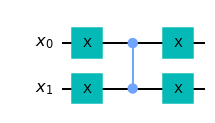

In [5]:
#Program 6.2 Define quantum oracle for input solution='00'
from qiskit import QuantumRegister,QuantumCircuit
qrx = QuantumRegister(2,'x')
qc = QuantumCircuit(qrx)
qc.x([0,1])
qc.cz(0,1)
qc.x([0,1])
print("The quantum circuit of phase oracle for input solution='00':")
qc.draw('mpl')

The quantum circuit of phase oracle for input solution='01':


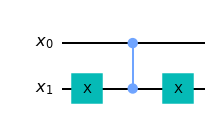

In [6]:
#Program 6.3 Define quantum oracle for input solution='01'
from qiskit import QuantumRegister,QuantumCircuit
qrx = QuantumRegister(2,'x')
qc = QuantumCircuit(qrx)
qc.x(1)
qc.cz(0,1)
qc.x(1)
print("The quantum circuit of phase oracle for input solution='01':")
qc.draw('mpl')

The quantum circuit of phase oracle for input solution='10':


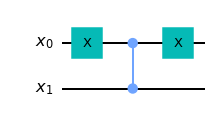

In [7]:
#Program 6.4 Define quantum oracle for input solution='10'
from qiskit import QuantumRegister,QuantumCircuit
qrx = QuantumRegister(2,'x')
qc = QuantumCircuit(qrx)
qc.x(0)
qc.cz(1,0)
qc.x(0)
print("The quantum circuit of phase oracle for input solution='10':")
qc.draw('mpl')

The quantum circuit of phase oracle for input solution='11':


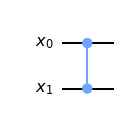

In [8]:
#Program 6.5 Define quantum oracle for input solution='11'
from qiskit import QuantumRegister,QuantumCircuit
qrx = QuantumRegister(2,'x')
qc = QuantumCircuit(qrx)
qc.cz(1,0)
print("The quantum circuit of phase oracle for input solution='11':")
qc.draw('mpl')

The quantum circuit of Grover's algorithm for input solution='10':


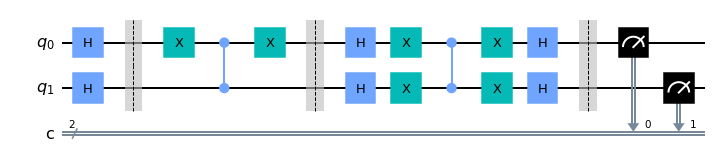

Total counts for qubit states are: {'10': 1000}


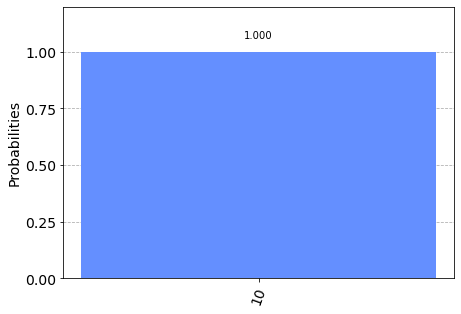

In [9]:
#Program 6.6 Grover alg. with oracle for input solution='10'
from qiskit import QuantumCircuit,execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
qc = QuantumCircuit(2,2)
qc.h([0,1])
qc.barrier()
qc.x(0)
qc.cz(1,0)
qc.x(0)
qc.barrier()
qc.h([0,1])
qc.x([0,1])
qc.cz(0,1)
qc.x([0,1])
qc.h([0,1])
qc.barrier()
qc.measure([0,1],[0,1])
print("The quantum circuit of Grover's algorithm for input solution='10':")
display(qc.draw('mpl'))
sim = AerSimulator()
job=execute(qc, backend=sim, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print("Total counts for qubit states are:",counts)
display(plot_histogram(counts))

The quantum circuit of Grover's algorithm for input solution='101':


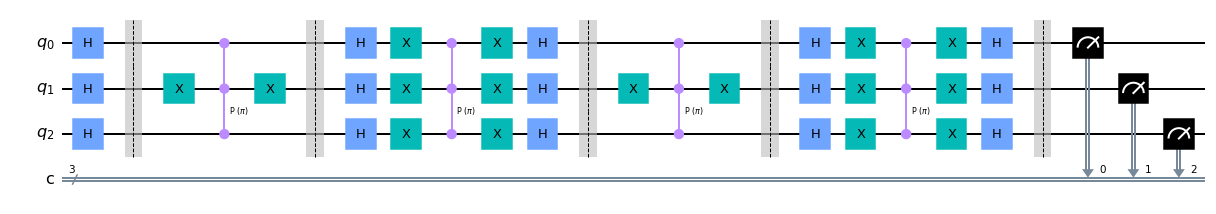

Total counts for qubit states are: {'101': 949, '000': 9, '100': 8, '011': 11, '111': 10, '110': 3, '010': 5, '001': 5}


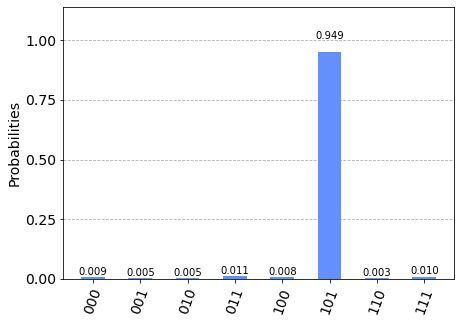

In [10]:
#Program 6.7 Grover alg. with oracle for input solution='101'
from qiskit import QuantumCircuit,execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
from math import pi
qc = QuantumCircuit(3,3)
qc.h([0,1,2])
qc.barrier()
for repeat in range(2):
  qc.x(1)
  qc.mcp(pi,[0,1],2)
  qc.x(1)
  qc.barrier()
  qc.h([0,1,2])
  qc.x([0,1,2])
  qc.mcp(pi,[0,1],2)
  qc.x([0,1,2])
  qc.h([0,1,2])
  qc.barrier()
qc.measure([0,1,2],[0,1,2])
print("The quantum circuit of Grover's algorithm for input solution='101':")
display(qc.draw('mpl'))
sim = AerSimulator()
job=execute(qc, backend=sim, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print("Total counts for qubit states are:",counts)
display(plot_histogram(counts))

The quantum circuit of Grover's algorithm:


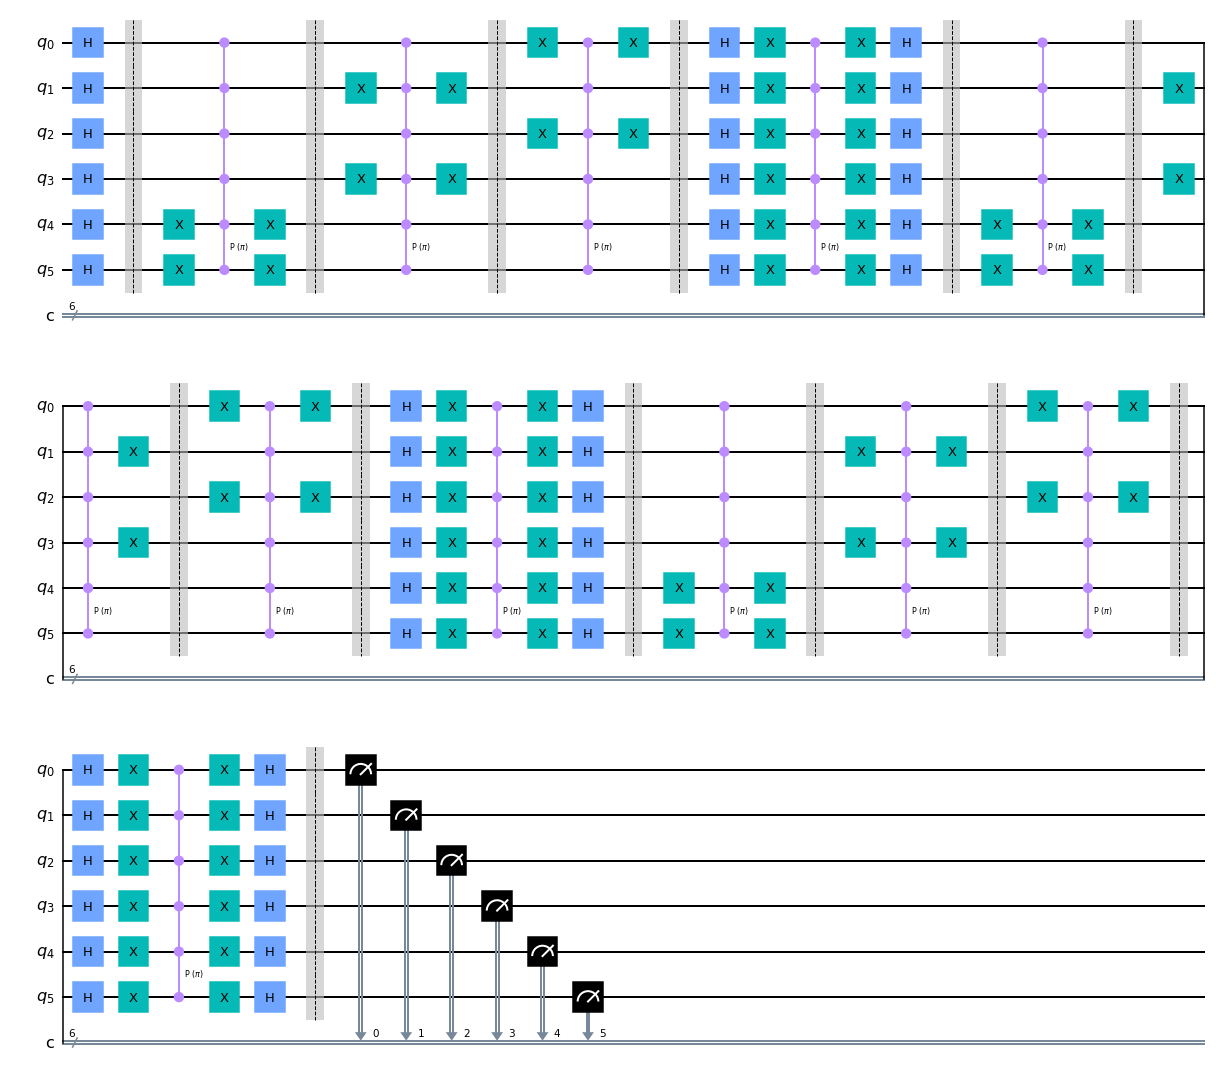

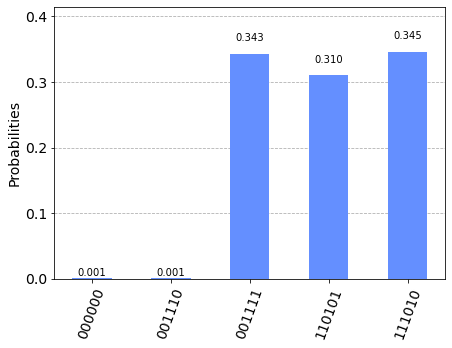

Total counts for qubit states are: {'001111': 343, '111010': 345, '110101': 310, '000000': 1, '001110': 1}
The solutions to the Hamiltonian cycle problem are:
111010 (e1->e3->e4->e5)
001111 (e0->e1->e2->e3)
110101 (e0->e2->e4->e5)


In [11]:
#Program 6.8 Solve Hamiltonian cycle prob. for clique-4 with Grover alg.
from qiskit import QuantumCircuit,execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
from math import pi
qc = QuantumCircuit(6,6)
qc.h(range(6))
qc.barrier()
for repeat in range(3):
  qc.x([4,5])
  qc.mcp(pi,list(range(5)),5)
  qc.x([4,5])
  qc.barrier()
  qc.x([1,3])
  qc.mcp(pi,list(range(5)),5)
  qc.x([1,3])
  qc.barrier()
  qc.x([0,2])
  qc.mcp(pi,list(range(5)),5)
  qc.x([0,2])
  qc.barrier()
  qc.h(range(6))
  qc.x(range(6))
  qc.mcp(pi,list(range(5)),5)
  qc.x(range(6))
  qc.h(range(6))
  qc.barrier()
qc.measure(range(6),range(6))
print("The quantum circuit of Grover's algorithm:")
display(qc.draw('mpl'))
sim = AerSimulator()
job=execute(qc, backend=sim, shots=1000)
result = job.result()
counts = result.get_counts(qc)
display(plot_histogram(counts))
print("Total counts for qubit states are:",counts)
sorted_counts=sorted(counts.items(),key=lambda x:x[1], reverse=True)
print("The solutions to the Hamiltonian cycle problem are:")
#find_all_ones=lambda s:[x for x in range(s.find('1'), len(s)) if s[x]=='1']
find_all_ones=lambda s:[x for x in range(len(s)) if s[x]=='1']
for i in range(3):  #It is konw there are (4-1)!/2=3 solutions
  scstr=sorted_counts[i][0] #scstr: string in sorted_counts
  print(scstr,end=' (')
  reverse_scstr=scstr[::-1] #reverse scstr for LSB at the right 
  all_ones=find_all_ones(reverse_scstr)
  for one in all_ones[0:-1]:
    print('e'+str(one)+'->',end='')
  print('e'+str(all_ones[-1])+')')                       